# Campus Analytics Challenge 2022: Determine Transaction Categories Using Machine Learning and Natural Language Processing

Building a model to predict transaction categories using the following 10 (ten) distinct categories that a transaction may fall into:


• Communication Services
• Education
• Entertainment
• Finance
• Health and Community Service
• Property and Business Services
• Retail Trade
• Services to Transport
• Trade, Professional and Personal Services
• Travel 

In [135]:
# import all the required libraries

import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#load the training dataset

data = pd.read_csv('Training.csv',sep=',')
data.head()


,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,RECUR DEBIT CRD PMT11/11 DELTA DENTAL OF A11 O...,6300.0,58.34,D,Card,Debit Card,False,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Delta Dental,Finance
1,HH,T201302289909010349,"CHECK CRD PURCHASE 11/11 SURETY SOLUTIONS, ...",NaN,103.00,D,Card,Check Card,False,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance
2,HH,T20130726991361190114550,CHECK CRD PURCHASE 11/11 THE COPY STOP ...,NaN,22.44,D,Card,Check Card,False,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance
3,BK,T201207095780929968,MARKET ALERT INC 111-111-1111 TX,7375.0,22.44,NaN,Card,Credit Card,False,MARKET ALERT INC,111-111-1111 TX,Market Alert,Market Alert,Finance
4,HH,T20131230990558080004939,CHECK CRD PURCHASE 11/11 PERT- NER PERFECT ...,NaN,66.25,D,Card,Check Card,False,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance


In [136]:
# Count per category

print(f"Total unique categories are: {len(data['Category'].value_counts())}")
print(f"Count of occurance of each category:")
data['Category'].value_counts()

Total unique categories are: 10
Count of occurance of each category:


Retail Trade                                 13500
Entertainment                                11255
Trade, Professional and Personal Services     5275
Health and Community Services                 4157
Services to Transport                         2317
Travel                                        1489
Property and Business Services                1095
Education                                      445
Communication Services                         282
Finance                                        185
Name: Category, dtype: int64

In [137]:
# Create list of StopWords

import nltk
nltk.download('stopwords') #Importing nltk package for applying Stopwords removal technique
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Shilpa
[nltk_data]     Mahadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
# import all the required libraries for word embedding

import nltk
nltk.download('all')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Shilpa
[nltk_data]    |     Mahadik\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Shilpa
[nltk_data]    |     Mahadik\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Shilpa
[nltk_data]    |     Mahadik\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Shilpa
[nltk_data]    |     Mahadik\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nlt

In [139]:
# Initialise word embedding

lemmatizer = WordNetLemmatizer()

Post examining the given training dataset the two unique columns that were suitable for NLP processing are 'trans_desc'  and 'default_brand' 

In [140]:
# Converting all strings of column 'trans_desc' into lowercase and splitting it for removing Stopwords

data.trans_desc = data.trans_desc.str.lower()
data.trans_desc = data.trans_desc.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop)]))
data


,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,recur debit crd pmt11/11 delta dental a11 111-...,6300.0,58.34,D,Card,Debit Card,False,DELTA DENTAL OF A11 OF,111-1111111 AR,Delta Dental,Delta Dental,Finance
1,HH,T201302289909010349,"check crd purchase 11/11 surety solutions, 111...",NaN,103.00,D,Card,Check Card,False,"SURETY SOLUTIONS,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance
2,HH,T20130726991361190114550,check crd purchase 11/11 copy stop salt lake c...,NaN,22.44,D,Card,Check Card,False,THE COPY STOP,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance
3,BK,T201207095780929968,market alert inc 111-111-1111 tx,7375.0,22.44,NaN,Card,Credit Card,False,MARKET ALERT INC,111-111-1111 TX,Market Alert,Market Alert,Finance
4,HH,T20131230990558080004939,check crd purchase 11/11 pert- ner perfect woo...,NaN,66.25,D,Card,Check Card,False,PERT- NER PERFECT,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,HH,T20130726991321130015959,check crd purchase 11/11 allied fidelity se 11...,NaN,100.00,D,Card,Check Card,False,ALLIED FIDELITY SE,111-111-1111 KS,Fidelity Investments,Fidelity Investments,Finance
39996,HH,T201208319925685298,check crd purchase 11/11 foremost insurance 11...,NaN,184.78,D,Card,Check Card,False,FOREMOST INSURANCE,111-1111111 MI,Foremost Insurance,Foremost Insurance,Finance
39997,HH,T20111004560028307,"check crd purchase 11/11 propay usa- propay, 1...",7399.0,9.95,D,Card,Check Card,False,"PROPAY USA- ProPay, In",111-1111111 UT,Propay,Propay,Finance
39998,HH,T20110601320040304,check crd purchase 11/11 cowboy finance llc 11...,6051.0,250.00,D,Card,Check Card,False,COWBOY FINANCE LLC,111-1111111 NM,Cowboy Finance,Cowboy Finance,Finance


In [141]:
# Converting all strings of column 'default_brand' into lowercase and splitting it for removing Stopwords

data.default_brand = data.default_brand.str.lower()
data.default_brand = data.default_brand.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop)]))
data

,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,recur debit crd pmt11/11 delta dental a11 111-...,6300.0,58.34,D,Card,Debit Card,False,delta dental a11,111-1111111 AR,Delta Dental,Delta Dental,Finance
1,HH,T201302289909010349,"check crd purchase 11/11 surety solutions, 111...",NaN,103.00,D,Card,Check Card,False,"surety solutions,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance
2,HH,T20130726991361190114550,check crd purchase 11/11 copy stop salt lake c...,NaN,22.44,D,Card,Check Card,False,copy stop,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance
3,BK,T201207095780929968,market alert inc 111-111-1111 tx,7375.0,22.44,NaN,Card,Credit Card,False,market alert inc,111-111-1111 TX,Market Alert,Market Alert,Finance
4,HH,T20131230990558080004939,check crd purchase 11/11 pert- ner perfect woo...,NaN,66.25,D,Card,Check Card,False,pert- ner perfect,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,HH,T20130726991321130015959,check crd purchase 11/11 allied fidelity se 11...,NaN,100.00,D,Card,Check Card,False,allied fidelity se,111-111-1111 KS,Fidelity Investments,Fidelity Investments,Finance
39996,HH,T201208319925685298,check crd purchase 11/11 foremost insurance 11...,NaN,184.78,D,Card,Check Card,False,foremost insurance,111-1111111 MI,Foremost Insurance,Foremost Insurance,Finance
39997,HH,T20111004560028307,"check crd purchase 11/11 propay usa- propay, 1...",7399.0,9.95,D,Card,Check Card,False,"propay usa- propay,",111-1111111 UT,Propay,Propay,Finance
39998,HH,T20110601320040304,check crd purchase 11/11 cowboy finance llc 11...,6051.0,250.00,D,Card,Check Card,False,cowboy finance llc,111-1111111 NM,Cowboy Finance,Cowboy Finance,Finance


In [142]:
# display records from dataframe

data.head()

,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,recur debit crd pmt11/11 delta dental a11 111-...,6300.0,58.34,D,Card,Debit Card,False,delta dental a11,111-1111111 AR,Delta Dental,Delta Dental,Finance
1,HH,T201302289909010349,"check crd purchase 11/11 surety solutions, 111...",NaN,103.00,D,Card,Check Card,False,"surety solutions,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance
2,HH,T20130726991361190114550,check crd purchase 11/11 copy stop salt lake c...,NaN,22.44,D,Card,Check Card,False,copy stop,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance
3,BK,T201207095780929968,market alert inc 111-111-1111 tx,7375.0,22.44,NaN,Card,Credit Card,False,market alert inc,111-111-1111 TX,Market Alert,Market Alert,Finance
4,HH,T20131230990558080004939,check crd purchase 11/11 pert- ner perfect woo...,NaN,66.25,D,Card,Check Card,False,pert- ner perfect,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance


In [143]:
# Remove unimportant words from the data using regex 

import re

data.trans_desc = data.trans_desc.apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(x{6})|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
data.trans_desc = data.trans_desc.apply(lambda elem: re.sub(r"\d+", "", elem))


tags = (
('\xe2\x80\x99', "'"),
('\xc3\xa9', 'e'),
('\xe2\x80\x90', '-'),
('\xe2\x80\x91', '-'),
('\xe2\x80\x92', '-'),
('\xe2\x80\x93', '-'),
('\xe2\x80\x94', '-'),
('\xe2\x80\x94', '-'),
('\xe2\x80\x98', "'"),
('\xe2\x80\x9b', "'"),
('\xe2\x80\x9c', '"'),
('\xe2\x80\x9c', '"'),
('\xe2\x80\x9d', '"'),
('\xe2\x80\x9e', '"'),
('\xe2\x80\x9f', '"'),
('\xe2\x80\xa6', '...'),
('\xe2\x80\xb2', "'"),
('\xe2\x80\xb3', "'"),
('\xe2\x80\xb4', "'"),
('\xe2\x80\xb5', "'"),
('\xe2\x80\xb6', "'"),
('\xe2\x80\xb7', "'"),
('\xe2\x81\xba', "+"),
('\xe2\x81\xbb', "-"),
('\xe2\x81\xbc', "="),
('\xe2\x81\xbd', "("),
('\xe2\x81\xbe', ")")
)

In [144]:
# display records from dataframe to validate above regex

data

,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20110701260061756,recur debit crd pmt delta dental a ar mcc,6300.0,58.34,D,Card,Debit Card,False,delta dental a11,111-1111111 AR,Delta Dental,Delta Dental,Finance
1,HH,T201302289909010349,check crd purchase surety solutions mcc,NaN,103.00,D,Card,Check Card,False,"surety solutions,",111-111-1111 OR,Surety Solutions,Surety Solutions,Finance
2,HH,T20130726991361190114550,check crd purchase copy stop salt lake cit ut...,NaN,22.44,D,Card,Check Card,False,copy stop,SALT LAKE CIT UT,The Copy Stop,The Copy Stop,Finance
3,BK,T201207095780929968,market alert inc tx,7375.0,22.44,NaN,Card,Credit Card,False,market alert inc,111-111-1111 TX,Market Alert,Market Alert,Finance
4,HH,T20131230990558080004939,check crd purchase pert ner perfect woodland ...,NaN,66.25,D,Card,Check Card,False,pert- ner perfect,THE WOODLANDS TX,Hometown Insurance Partners,Hometown Insurance Partners,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,HH,T20130726991321130015959,check crd purchase allied fidelity se k mcc,NaN,100.00,D,Card,Check Card,False,allied fidelity se,111-111-1111 KS,Fidelity Investments,Fidelity Investments,Finance
39996,HH,T201208319925685298,check crd purchase foremost insurance mi mcc,NaN,184.78,D,Card,Check Card,False,foremost insurance,111-1111111 MI,Foremost Insurance,Foremost Insurance,Finance
39997,HH,T20111004560028307,check crd purchase propay usa propay ut mcc,7399.0,9.95,D,Card,Check Card,False,"propay usa- propay,",111-1111111 UT,Propay,Propay,Finance
39998,HH,T20110601320040304,check crd purchase cowboy finance llc nm mcc,6051.0,250.00,D,Card,Check Card,False,cowboy finance llc,111-1111111 NM,Cowboy Finance,Cowboy Finance,Finance


In [145]:
# define independent(X) and dependent(Y) variables

X = data['trans_desc']+data['default_brand']
y = data['Category']

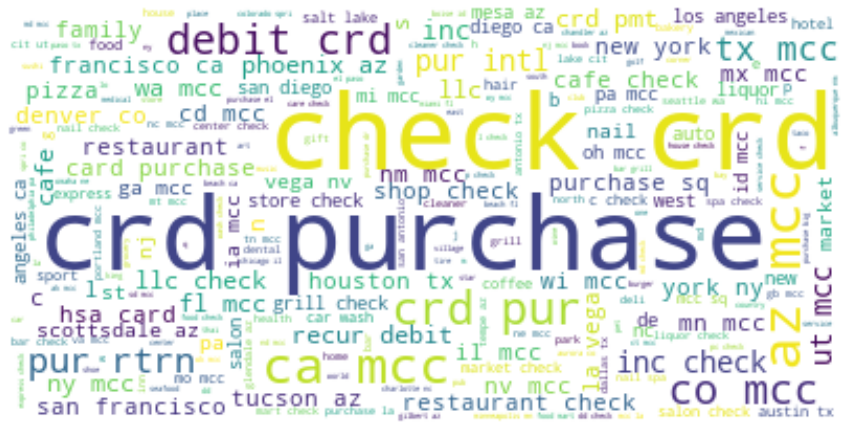

In [146]:
# generate wordcloud for 'trans_desc' column 

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
A = " ".join(trans_desc for trans_desc in X)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=500, background_color="white")
wordcloud.generate(A)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

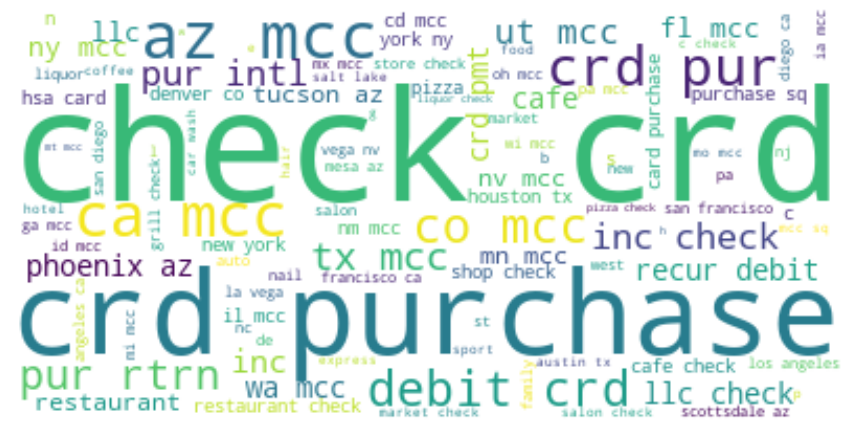

In [147]:
# generate wordcloud for 'default_brand' column

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
B = " ".join(default_brand for default_brand in X)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, max_font_size=90, max_words=100, background_color="white")
wordcloud.generate(B)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

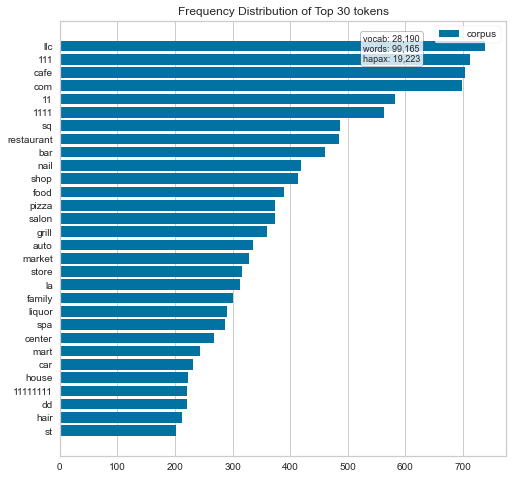

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [148]:
#frequency count:

from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Find the Document Term Frequency Matrix

vect = CountVectorizer(stop_words='english')
word_frequency = vect.fit_transform(data.default_brand)

# Get all features (tokens)

features = vect.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens

fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(word_frequency)
visualizer.poof()

In [159]:
# display records from independent variable

X.head()

0    recur debit crd pmt delta dental a  ar   mcc d...
1    check crd purchase  surety solutions    mccsur...
2    check crd purchase  copy stop salt lake cit ut...
3                 market alert inc  txmarket alert inc
4    check crd purchase  pert ner perfect woodland ...
dtype: object

In [160]:
# Split the training data in the ratio 70:30 (70%-train, 30%-test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

# check the shape of the splitted data

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (28000,)
Testing Data Shape: (12000,)


In [161]:
# Count Vectorizer from scikit learn

cv = CountVectorizer(binary=True)

X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(28000, 34623)

In [162]:
# initialise first model - LinearSVC

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_cv,y_train)

LinearSVC()

In [163]:
# Let's test it for the first 8 transactions in the Test dataset

X_test1 = X_test[0:8]
print(X_test1)

17712    check crd purchase  auntie chang dumpl houston...
22541    check crd purchase  el gallo de lagos mesa az ...
19874    check crd purchase  gogo pillow  ca   mccgogo ...
19827     check crd purchase  shop  seattle wa   mccshop 1
34084    check crd pur rtrn  sam moon trading fri frisc...
16001    recur debit crd pmt twxwjplayboy  ny   mcc twx...
4108     check crd purchase  ad beer wine  tx   mccad b...
12845    check crd purchase  prasais thai  go twin fall...
dtype: object


In [164]:
# prediction of category by classifier

X_test1_cv = cv.transform(X_test1)
clf.predict(X_test1_cv)

array(['Entertainment', 'Entertainment', 'Retail Trade', 'Retail Trade',
       'Retail Trade', 'Property and Business Services', 'Retail Trade',
       'Entertainment'], dtype=object)

In [165]:
# Transform the test data before predicting

X_test_cv = cv.transform(X_test)

In [166]:
# Form a prediction set

predictions = clf.predict(X_test_cv)

In [167]:
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[  30    0    7    0    0    2   33    1    4    2]
 [   1   16   20    1   13    1   62    3   11    2]
 [   1    7 2358    0   58   10  729   41   74   46]
 [   0    0    6   14    3    2   26    0    8    2]
 [   2    5   99    1  825    6  250    8   48    8]
 [   2    2   30    0   11  127  129    5   24    3]
 [   5   15  558    8  105   30 2991  100  192   36]
 [   1    1   71    0   20    6  208  397   23    8]
 [   2    4  197    4   71   11  464   27  833   20]
 [   2    1   59    0    6    7  120   14   15  189]]
                                           precision    recall  f1-score   support

                   Communication Services       0.65      0.38      0.48        79
                                Education       0.31      0.12      0.18       130
                            Entertainment       0.69      0.71      0.70      3324
                                  Finance       0.50      0.23      0.31        61
            Health and Community Services       0.74 

In [169]:
# single command to create a pipeline of activities...vectorize and classify the text for LinearSVC
clf_cvec_lsvc = Pipeline([('cvec', CountVectorizer()),
                     ('clf', LinearSVC())])

# Feed the training data through the pipeline
clf_cvec_lsvc.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('clf', LinearSVC())])

In [170]:
# Form a prediction set
# No need to convert the test data. Classifier cretaed in the pipeline will take care of it
predictions = clf_cvec_lsvc.predict(X_test)

# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[  30    1    7    0    0    2   32    0    5    2]
 [   2   19   26    0   11    1   58    3    9    1]
 [   2    6 2307    1   60   18  748   41   88   53]
 [   0    1    7   13    1    3   25    1    8    2]
 [   5    6  104    1  814    9  242   10   51   10]
 [   2    3   28    0   12  127  126    4   24    7]
 [   8   18  541    8  106   40 2913  121  232   53]
 [   1    2   65    1   21   10  204  384   32   15]
 [   6    7  192    4   65   13  447   28  846   25]
 [   2    3   69    0   12    8  100   15   18  186]]
                                           precision    recall  f1-score   support

                   Communication Services       0.52      0.38      0.44        79
                                Education       0.29      0.15      0.19       130
                            Entertainment       0.69      0.69      0.69      3324
                                  Finance       0.46      0.21      0.29        61
            Health and Community Services       0.74 

In [171]:
# single command to create a pipeline of activities...TFIDF vectorize and classify the text for LinearSVC

clf_tfidf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])

# Feed the training data through the pipeline
clf_tfidf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [172]:
# Form a prediction set
predictions = clf_tfidf_lsvc.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6594166666666667


In [173]:
# initialise second model - MultinomialNB
# single command to create a pipeline of activities...TFIDF vectorize and classify the text for MultinomialNB

clf_tfidf_mnb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
clf_tfidf_mnb.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [174]:
# Form a prediction set
predictions = clf_tfidf_mnb.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5770833333333333


In [175]:
# initialise third model - LogisticRegression
# single command to create a pipeline of activities...TFIDF vectorize and classify the text for LogisticRegression
clf_tfidf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression())])

# Feed the training data through the pipeline
clf_tfidf_lr.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [176]:
# Form a prediction set
predictions = clf_tfidf_lr.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6441666666666667


In [177]:
# initialise fourth model - KNeighborsClassifier
# single command to create a pipeline of activities...TFIDF vectorize and classify the text for KNeighborsClassifier
clf_tfidf_knc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier())])

# Feed the training data through the pipeline
clf_tfidf_knc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [178]:
# Form a prediction set
predictions = clf_tfidf_knc.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.57675


In [179]:
# initialise fifth model - RandomForestClassifier
# single command to create a pipeline of activities...TFIDF vectorize and classify the text for RandomForestClassifier
clf_tfidf_rfc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])

# Feed the training data through the pipeline
clf_tfidf_rfc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [180]:
# Form a prediction set
predictions = clf_tfidf_rfc.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.56425


In [181]:
# import models from scikit learning
from sklearn.linear_model import SGDClassifier

In [182]:
# initialise sixth model - SGDClassifier
# single command to create a pipeline of activities...TFIDF vectorize and classify the text for SGDClassifier
clf_tfidf_sgd = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SGDClassifier())])

# Feed the training data through the pipeline
clf_tfidf_sgd.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SGDClassifier())])

In [183]:
# Form a prediction set
predictions = clf_tfidf_sgd.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6613333333333333


In [184]:
# import models from scikit learning
from sklearn.neural_network import MLPClassifier

In [185]:
#Neural Networks can be viewed as generalization of linear models that perform multiple stages of processingto 
#come to a decision

clf_tfidf_mlp = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MLPClassifier(solver='lbfgs',random_state=0,
                        hidden_layer_sizes=[50], max_iter=50000))])

# Feed the training data through the pipeline
clf_tfidf_mlp.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=[50], max_iter=50000,
                               random_state=0, solver='lbfgs'))])

In [186]:
# Form a prediction set
predictions = clf_tfidf_mlp.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6129166666666667


In [187]:
# LinearSVC with stopwords
clf_tfidf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop)),
                     ('clf', LinearSVC())])

# Feed the training data through the pipeline
clf_tfidf_lsvc2.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf', LinearSVC())])

In [188]:
# Form a prediction set
predictions = clf_tfidf_lsvc2.predict(X_test)

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6589166666666667


In [189]:
#load the test dataset

dataTest = pd.read_csv('TestData.csv',sep=',')

# display records from dataframe

dataTest.head()


,sor,cdf_seq_no,trans_desc,merchant_cat_code,amt,db_cr_cd,payment_reporting_category,payment_category,is_international,default_brand,default_location,qrated_brand,coalesced_brand,Category
0,HH,T20131230990668080055738,CHECK CRD PURCHASE 11/11 PACKAGE EXPRESS ...,NaN,10.35,D,Card,Check Card,False,PACKAGE EXPRESS,LACEY WA,Package Express,Package Express,NaN
1,HH,T201302289918775816,RECUR DEBIT CRD PMT11/11 YP *FRMLY AT&T AD ...,NaN,36.00,D,Card,Debit Card,False,YP *FRMLY AT&T AD,111-111-1111 CA,At And T,At And T,NaN
2,HH,T20130726991361190218055,CHECK CRD PURCHASE 11/11 NORMAN G JENSEN IN ...,NaN,27.00,D,Card,Check Card,False,NORMAN G JENSEN IN,111-1111111 MN,Norman G Jensen,Norman G Jensen,NaN
3,HH,T201208319924922772,CHECK CRD PUR RTRN 11/11 TWILIO ...,NaN,20.00,C,Card,Check Card,False,TWILIO,SAN FARANSICO CA,Twilio,Twilio,NaN
4,HH,T20131230990638080027066,CHECK CRD PURCHASE 11/11 AT&T D11K 1111 ...,NaN,325.78,D,Card,Check Card,False,AT&T D11K 1111,FORT WORTH TX,At And T,At And T,NaN


| Model Name | Accuracy |
| :- |  :-: |
| Linear Support Vector Classifier | 65.94%
| Multinomial Naive Bayes | 57.70%
| Logistic Regression | 64.41%
| K-Nearest Neighbors| 57.67%
| Random Forest| 56.42%
| Stochastic Gradient Descent(SGD) Classifier | 66.13%
| <b>Best Model - SGD Classifier</b>| <b>66.13%</b>

<b>Observation</b> : From the above result the accuracy of SGD is observed to be <b>66.13%</b> Compared to the models executed in the above analysis, the SGD has a high degree of accuracy in predicting test data.

In [190]:
# import SGDClassifier from scikit learn
# import other required libraries

from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd

In [191]:
# define independent(X) and dependent(Y) variables for test dataset

XTest = dataTest['trans_desc']+dataTest['default_brand']

In [193]:
# Form a prediction set for test dataset

predictionsTest = clf_tfidf_sgd.predict(XTest)

In [194]:
# show category prediction for test dataset

print(predictionsTest)

['Retail Trade' 'Communication Services' 'Travel' ... 'Travel'
 'Entertainment' 'Retail Trade']


In [195]:
# reshape prediction for test dataset

Test = predictionsTest.reshape(10000,1)
print(Test)

[['Retail Trade']
 ['Communication Services']
 ['Travel']
 ...
 ['Travel']
 ['Entertainment']
 ['Retail Trade']]


In [133]:
# convert independent variables into dataframe
# add predicted column to the existing dataframe

Newdf = pd.DataFrame(XTest)
Newdf.columns = ["Trans_desc_brand"]
Newdf['Prediction'] = Test
Newdf.head()


,Trans_desc_brand,Prediction
0,CHECK CRD PURCHASE 11/11 PACKAGE EXPRESS ...,Retail Trade
1,RECUR DEBIT CRD PMT11/11 YP *FRMLY AT&T AD ...,Communication Services
2,CHECK CRD PURCHASE 11/11 NORMAN G JENSEN IN ...,Travel
3,CHECK CRD PUR RTRN 11/11 TWILIO ...,Retail Trade
4,CHECK CRD PURCHASE 11/11 AT&T D11K 1111 ...,Communication Services


In [197]:
# Count per category

print(f"Total unique categories are: {len(Newdf['Prediction'].value_counts())}")
print(f"Count of occurance of each category:")
Newdf['Prediction'].value_counts()

Total unique categories are: 10
Count of occurance of each category:


Retail Trade                                 5643
Entertainment                                2274
Health and Community Services                 699
Trade, Professional and Personal Services     600
Services to Transport                         439
Travel                                        189
Property and Business Services                100
Communication Services                         38
Education                                       9
Finance                                         9
Name: Prediction, dtype: int64

In [198]:
# export predicted category results to csv file

Newdf.to_csv("predicted_category.csv")

<b>Observation</b>: According to this data, the category of <b>Retail Trade</b> has the most transactions done compared to all other categories, whereas the categories of <b>Education</b> and <b>Finance</b> have the fewest.



- Customers of Wells Fargo will benefit from this model by being able to track their spending in a certain category.
- Customers can recognize recurring purchases and subscriptions, accurately classify their income and activity liability, and lower credit risks.
- By doing so, human effort will be reduced in tracking expenses.